In [1]:
! pip install numpy pandas matplotlib seaborn sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",skiprows = 3,header = None)

X_valid = pd.read_csv("X_valid.csv",skiprows = 3,header = None)

X_test = pd.read_csv("X_test.csv",skiprows = 4,header = None)


#combine header and the data together
X_train.columns = X_header
X_valid.columns = X_header
X_test.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [32]:
train_id = X_train.iloc[:,0]
valid_id = X_valid.iloc[:,0]
test_id  = X_test.iloc[:,0]
X_train = X_train.iloc[:,1:]
X_valid = X_valid.iloc[:,1:]
X_test  = X_test.iloc[:,1:]
X_header = X_header[1:]

y_train = Y_train.iloc[:,1]
y_valid = Y_valid.iloc[:,1]
print("X_train:",X_train.shape)
print("X_valid:",X_valid.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_valid:",Y_valid.shape)

X_train: (16760, 7488)
X_valid: (2394, 7488)
X_test: (4790, 7488)
Y_train: (16760, 2)
Y_valid: (2394, 2)


In [7]:
print("ratio of 1 in Y_valid")
print(np.sum(Y_valid.iloc[:,1])/Y_valid.shape[0])

ratio of 1 in Y_valid
0.06349206349206349


In [8]:
def featureSelect(df_select,df_X):
    cols = np.full(df_X.shape[1], False, dtype = bool)
    for i,feat in enumerate(df_X.columns):
        if feat in df_select.columns:
            cols[i] = True
    res = df_X.iloc[:,cols]
    res.columns = df_select.columns
    return df_X.iloc[:,cols]


In [ ]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_train_mean = featureSelectByMean(X_train,df_X_header)
X_train_mean.describe()

Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [26]:

X_train_mean[X_train_mean == 0] = np.nan
X_train_mean.isnull().sum()

/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_12000/3102716487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_mean[X_train_mean == 0] = np.nan
/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_12000/3102716487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_mean[X_train_mean == 0] = np.nan


alanine aminotransferase&mean&1                        9038
alanine aminotransferase&mean&2                        9038
alanine aminotransferase&mean&3                        9038
alanine aminotransferase&mean&4                        9038
alanine aminotransferase&mean&5                        9038
                                                      ...  
white blood cell count urine&mean&20                  14879
white blood cell count urine&mean&21                  14879
white blood cell count urine&mean&22                  14879
white blood cell count urine&mean&23                  14879
white blood cell count urine&time_since_measured&0      747
Length: 2496, dtype: int64

In [27]:
# fill the nan cell with the mean of the column
for col in X_train_mean.columns:
    mean = np.mean(X_train_mean[col])
    X_train_mean[col].fillna(mean, inplace = True)

X_train_mean.describe()

/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_12000/3113889688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_mean[col].fillna(mean, inplace = True)


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,282.458378
std,0.417218,0.423197,0.421912,0.429907,0.430609,0.433016,0.430047,0.427235,0.420908,0.414654,...,0.339445,0.338852,0.338695,0.338709,0.338701,0.338701,0.338710,0.338710,0.338263,310.242366
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,1.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,72.000000
50%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,180.000000
75%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [28]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_train_corr = featureSelectByCorr(X_train_mean,0.9)
#for the part of data visualization
X_train_corr.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 401


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,1.676000e+04,16760.000000,16760.000000,16760.000000,1.676000e+04,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,45.100105,0.090500,56.868421,6.905796e-16,6920.953601,0.016125,8739.370574,3.108171e-18,...,1565.460133,-0.086947,-0.087665,82.114555,-0.032239,-0.022179,35.731152,0.001112,-0.001404,282.458378
std,0.417218,0.423197,33.099299,0.618241,44.778725,5.462116e-02,6258.569824,0.051815,8123.735314,5.516467e-02,...,1776.261364,0.167579,0.502631,80.141575,0.123496,0.811971,31.636408,0.962887,0.338098,310.242366
min,-0.279057,-0.279057,1.000000,-3.131888,1.000000,-1.702985e+00,2.000000,-2.312068,1.000000,-5.691630e-01,...,1.000000,-0.692272,-0.366371,1.000000,-2.765677,-3.517696,1.000000,-1.160785,-0.316046,1.000000
25%,-0.248043,-0.248043,24.000000,0.090500,24.000000,6.073573e-16,2161.500000,0.016125,2244.750000,2.348549e-17,...,405.000000,-0.086947,-0.087665,27.000000,-0.032239,-0.405690,20.000000,-0.414731,-0.001404,72.000000
50%,-0.141552,-0.140184,45.100105,0.090500,49.000000,6.073573e-16,5159.500000,0.016125,6216.000000,2.348549e-17,...,999.500000,-0.086947,-0.087665,71.000000,-0.032239,-0.022179,30.000000,-0.120972,-0.001404,180.000000
75%,-0.141552,-0.140184,48.000000,0.090500,69.000000,6.073573e-16,9888.000000,0.016125,13056.000000,2.348549e-17,...,2034.250000,-0.086947,-0.087665,96.000000,-0.032239,0.122018,35.731152,0.228741,-0.001404,360.000000
max,10.413320,10.413320,336.000000,3.492301,480.000000,3.469357e+00,31735.000000,1.613770,36853.000000,4.592960e+00,...,11424.000000,3.830272,8.913147,768.000000,3.207278,7.198578,431.000000,54.802581,11.783246,2232.000000


In [29]:
#Standardlization of features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train_corr))
X_train_std.columns = X_train_corr.columns

X_valid_corr = featureSelect(X_train_std,X_valid)
X_valid_std = pd.DataFrame(scaler.transform(X_valid_corr))
X_valid_std.columns = X_train_std.columns

X_test_corr = featureSelect(X_train_std,X_test)
X_test_std = pd.DataFrame(scaler.transform(X_test_corr))
X_test_std.columns = X_train_std.columns

print(X_train_std.shape)
print(X_valid_std.shape)
print(X_test_std.shape)

(16760, 401)
(2394, 401)
(4790, 401)


Features selected after applying SLR model with L1 regularization:
L1 C value: 0.001 	Number of features: 401 	Selected: 0
L1 C value: 0.002 	Number of features: 401 	Selected: 5
L1 C value: 0.003 	Number of features: 401 	Selected: 13
L1 C value: 0.004 	Number of features: 401 	Selected: 22
L1 C value: 0.005 	Number of features: 401 	Selected: 31
L1 C value: 0.006 	Number of features: 401 	Selected: 39
L1 C value: 0.007 	Number of features: 401 	Selected: 44
L1 C value: 0.008 	Number of features: 401 	Selected: 46
L1 C value: 0.009 	Number of features: 401 	Selected: 49
L1 C value: 0.01 	Number of features: 401 	Selected: 55
L1 C value: 0.011 	Number of features: 401 	Selected: 58
L1 C value: 0.012 	Number of features: 401 	Selected: 62
L1 C value: 0.013 	Number of features: 401 	Selected: 67
L1 C value: 0.014 	Number of features: 401 	Selected: 71


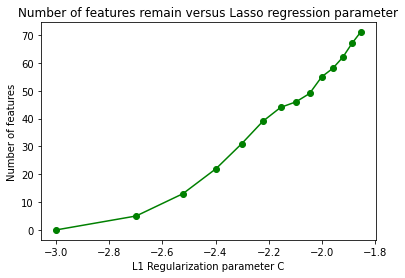

In [35]:
#Feature selection by simple logistic regression with L1 regulation
from sklearn.linear_model import LogisticRegression

def featerSelect_L1(X_train,y_train, X_valid, y_valid):
    C1 = [1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3,8e-3,9e-3,1e-2,1.1e-2,1.2e-2,1.3e-2,1.4e-2]
    print("Features selected after applying SLR model with L1 regularization:")
    n_feat = []
    for n_c1 in C1:
        clf = LogisticRegression(penalty = 'l1',C = n_c1, solver = 'liblinear')
        clf.fit(X_train,y_train)
    
        cols_l1 = []
        for i in range(clf.coef_.shape[1]):
            if clf.coef_[0,i] != 0.0:
                cols_l1.append(True)
            else:
                cols_l1.append(False)
        n_feat.append(np.sum(cols_l1))
        print("L1 C value:",n_c1, "\tNumber of features:",clf.coef_.shape[1], "\tSelected:",np.sum(cols_l1))

    nc_log = list(map(np.log10,C1))
    plt.xlabel("L1 Regularization parameter C1")
    plt.ylabel("Number of features")
    plt.title("Number of features remain versus Lasso regression parameter")
    plt.plot(nc_log, n_feat, marker = "o",color = "g")

featerSelect_L1(X_train_std,y_train, X_valid_std, y_valid)

In [41]:
def featureSelect_L1(X,Y,C = 0.01):
    clf = LogisticRegression(penalty = 'l1',C = C, solver = 'liblinear')
    clf.fit(X,Y)
    cols_l1 = []
    for i in range(clf.coef_.shape[1]):
        if clf.coef_[0,i] != 0.0:
            cols_l1.append(True)
        else:
            cols_l1.append(False)
    res = X.iloc[:,cols_l1]
    res.columns = X.columns[cols_l1]
    return res

X_train_select = featureSelect_L1(X_train_std,Y_train.iloc[:,1], C = 0.005)
X_valid_select = featureSelect(X_train_select, X_valid_std)
print(X_train_select.shape)

(16760, 31)


Maximized ROC_AUC : 0.7608338419644114 at CL2: 1000.0


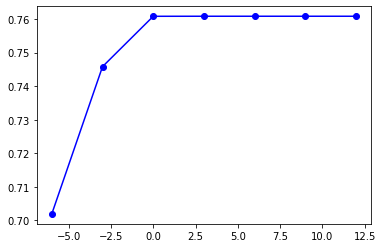

In [54]:
from sklearn.metrics import roc_auc_score

def visualize_AUC_L2(X_train,y_train, X_valid, y_valid,
                    l1_label = str(1e-3), CL2 = None, color = 'b'):
    
    if(CL2 == None):
        CL2 = [1e-6,1e-3,1,1e3,1e6,1e9,1e12]
    auc_list = []
    
    for CL2i in CL2:
        clf = LogisticRegression(penalty = 'l2', C = CL2i, solver = 'liblinear')
        clf.fit(X_train,y_train)
        auc_list.append(roc_auc_score(y_valid, clf.decision_function(X_valid)))

    nc_log = list(map(np.log10,CL2))
    plt.plot(nc_log, auc_list, marker = "o",color = color,label = l1_label)
    print("Maximized ROC_AUC :",np.max(auc_list),"at CL2:",CL2[auc_list.index(np.max(auc_list))])

visualize_AUC_L2(X_train_select, y_train, X_valid_select, y_valid)
    

using L1 regularization with C value: 0.02
Maximized ROC_AUC : 0.7771051457814921 at CL2: 100.0
using L1 regularization with C value: 0.03
Maximized ROC_AUC : 0.7847052678529508 at CL2: 1
using L1 regularization with C value: 0.04
Maximized ROC_AUC : 0.7858702286492323 at CL2: 1
using L1 regularization with C value: 0.05
Maximized ROC_AUC : 0.7872875487112071 at CL2: 100.0
using L1 regularization with C value: 0.06
Maximized ROC_AUC : 0.7834405371144185 at CL2: 1
using L1 regularization with C value: 0.1
Maximized ROC_AUC : 0.7752271233391239 at CL2: 0.01


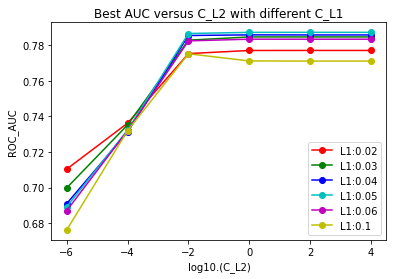

In [62]:
C_l1 = [2e-2,3e-2,4e-2,5e-2,6e-2,10e-2]
C_l2 = [1e-6,1e-4,1e-2,1,1e2,1e4]

def ViscualizeSLR_compare(C_l1, C_l2):
    plot_color = ['r','g','b','c','m','y','k']
    plot_color = plot_color[:len(C_l1)]
    
    for ci_l1, color in zip(C_l1,plot_color):
        print("using L1 regularization with C value:",ci_l1)
        X_train_select = featureSelect_L1(X_train_std,y_train, C = ci_l1)
        X_valid_select = featureSelect(X_train_select,X_valid_std)
        
        visualize_AUC_L2(X_train_select, y_train, X_valid_select, y_valid,
                          l1_label = ("L1:" + str(ci_l1)),CL2 = C_l2,color = color)
    
    plt.ylabel("ROC_AUC")
    plt.xlabel("log10.(C_L2)")
    plt.legend()
    plt.title("Best AUC versus C_L2 with different C_L1")
    
ViscualizeSLR_compare(C_l1,C_l2)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(random_state = 42)
clf3 = KNeighborsClassifier()
clf4 = RandomForestClassifier(random_state = 42)
clf5 = GradientBoostingClassifier(random_state = 42)

param1 = {'classifier__C': [1e-6,1e-4,1e-2,1,1e2],
          'classifier__penalty': ['l2'],
          'classifier' : [clf1]
         }

param2 = {'classifier__max_depth': [5,10,25,None],
          'classifier__min_samples_split': [2,5,10],
          'classifier__class_weight': [None,{0:1,1:5},{0:1,1:10}],
          'classifier' : [clf2]
         }

param3 = {'classifier__n_neighbors': [2,5,10,25,50],
         'classifier' : [clf3]
         }

param4 = {'classifier__n_estimators': [10,50,100,250],
         'classifier__max_depth': [5,10,20],
         'classifier__class_weight': [None,{0:1,1:5},{0:1,1:10}],
         'classifier' : [clf4]
         }

param5 = {'classifier__n_estimators': [10,50,100,250],
         'classifier__max_depth': [5,10,20],
         'classifier' : [clf5]
         }

pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5]

X_train_select = featureSelect_L1(X_train_std,y_train, C = 5e-2)

gs = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1, scoring = 'roc_auc', verbose = 1).fit(X_train_select, y_train)



Fitting 5 folds for each of 94 candidates, totalling 470 fits


In [64]:
gs.best_params_

{'classifier': RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=20,
                        n_estimators=250, random_state=42),
 'classifier__class_weight': {0: 1, 1: 5},
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [65]:
gs.best_score_

0.8651055220929699